In [1]:
# https://github.com/CelestialCartographers/Maple
using Maple, Plots, DataStructures

celestemaps = []
names = []

function displayvalues(name, values)
    println(name)

    values = sort(values, by = x -> x[2])
    n = length(values)
    println("Number of values: ", n)

    println("Minimum")
    for (i, (mapindex, value)) in enumerate(values[1:5])
        println(i, ". ", names[mapindex], " ", value)
    end

    println("Maximum")
    for (i, (mapindex, value)) in enumerate(reverse(values[n-4:n]))
        println(i, ". ", names[mapindex], " ", value)
    end

    histogram1 = histogram([value for (_, value) in values], title=name)
    histogram2 = histogram([value for (_, value) in values[floor(Int, 0.05*n):floor(Int, 0.95*n)]], title=string(name, " with extremes removed"))
    plot(histogram1, histogram2, layout=(2, 1))
end

for (root, _, files) in walkdir("Mods")
    for file in files
        filepath = joinpath(root, file)
        push!(names, filepath)
        push!(celestemaps, loadMap(filepath))
    end
end

numberofmaps = length(celestemaps)
println("Number of maps: ", numberofmaps)

Number of maps: 1136


In [2]:
dimensions = []

for celestemap in celestemaps
    (xmin, ymin, xmax, ymax) = Int.(Int.(Maple.bounds(celestemap)) ./ 8)
    push!(dimensions, (xmax - xmin, ymax - ymin))
end

Width
Number of values: 1136
Minimum
1. Mods\150682\Maps\Toto00\FrozenVault\1-FrozenVault-B.bin 40
2. Mods\150751\Maps\pupp\SummitEncore-B.bin 40
3. Mods\150799\Maps\DadbodContests2021\3-Height\Donker19.bin 40
4. Mods\327441\Maps\DecoContest2021\tobyaaa\rewot_suibom.bin 40
5. Mods\328498\Maps\BossSauceMapPack\1-Lobby\TreetopClimb.bin 40
Maximum


1. Mods\332000\Maps\phrog\CreepyCloth\Cloths.bin 100243
2. Mods\150513\Maps\MtEverest\0\MtEverest-D.bin 50164
3. Mods\150759\Maps\nameguysdsidespack\0\10-Farewell.bin 43249
4. Mods\150560\Maps\Thegur90\Solitude\Solitude.bin 42149
5. Mods\150508\Maps\aroxon\Temple\TempleOfMemories.bin 39890


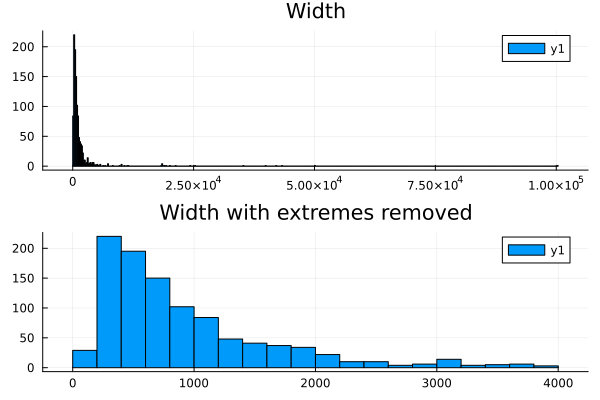

In [3]:
widths = [(index, width) for (index, (width, _)) in enumerate(dimensions)]
displayvalues("Width", widths)

Height
Number of values: 1136
Minimum
1. Mods\150404\Maps\ktnzero\zero\desolatevillage.bin 23
2. Mods\150418\Maps\Dong\0\9Eroc_C.bin 23
3. Mods\150471\Maps\FatherTower\disappointment.bin 23
4. Mods\150487\Maps\vct\leisuretime\cornerbooost.bin 23
5. Mods\150503\Maps\JaThePlayer\MC\MagicCity-C.bin 23
Maximum
1. Mods\351275\Maps\Tardigrade\WaterbearMountain\WaterbearMountain.bin 68128
2. Mods\292719\Maps\Into The Jungle\ch4.bin 22953
3. Mods\150453\Maps\BeefyUncleTorre\map\6.bin 20823
4. Mods\291321\Maps\Escapism\lieutenant\Escapism.bin 20098
5. Mods\150681\Maps\Cabob\FrozenHeights\3-FrostComplex.bin 12705


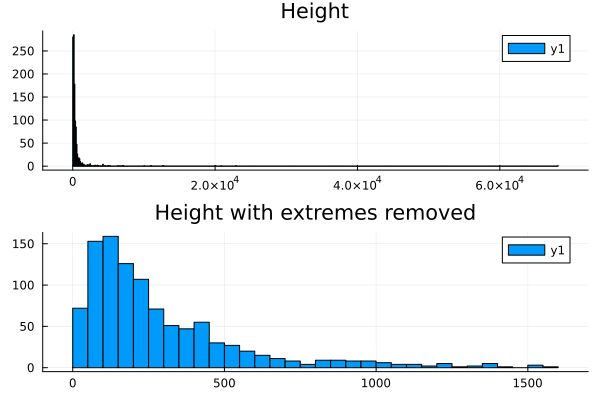

In [4]:
heights = [(index, height) for (index, (_, height)) in enumerate(dimensions)]
displayvalues("Height", heights)

Height to width ratio
Number of values: 1136
Minimum
1. Mods\150560\Maps\Thegur90\Solitude\Solitude.bin 0.006571923414553133
2. Mods\326785\Maps\EndGameContest2021\1-Submissions\Worldwaker2.bin 0.007661558960692871
3. Mods\303067\Maps\AliceGayWeek\day7.bin 0.009736747205192933
4. Mods\297808\Maps\Toneblock\MentalCollapse\MentalCollapse.bin 0.013411078717201166
5. Mods\150374\Maps\cabobday\oknano\0.bin 0.014404432132963989
Maximum
1. Mods\385401\Maps\tirednwired\CELESTE 2\CELES.bin 25.81111111111111
2. Mods\381885\Maps\OMWU\phant\towerhill.bin 22.9
3. Mods\384870\Maps\ParrotDashBirthdayCollab2022\1-Maps\Volcano.bin 17.125
4. Mods\150759\Maps\nameguysdsidespack\1\2-SummitOldOld-B.bin 15.792307692307693
5. Mods\328498\Maps\BossSauceMapPack\1-Lobby\TreetopClimb.bin 14.425


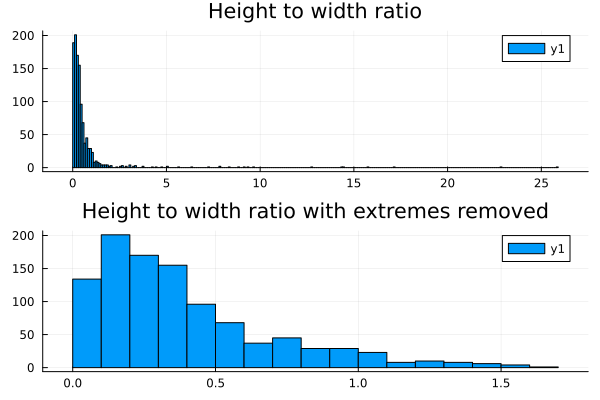

In [5]:
heighttowidthratio = [(index, height / width) for (index, (width, height)) in enumerate(dimensions)]
plot(displayvalues("Height to width ratio", heighttowidthratio))

In [6]:
using Images, SparseArrays

mapsizes = []
emptyspaces = []
playertoheartvector = []
bfsdistances = []

PATH = -2
HEART = -1
FOREGROUND = 0
EMPTY = 1
PLAYER = 2

AIR = '0'

# Generate an image of the BFS path in the map.
function bfspathimage(bfsgrid)
    grid = copy(bfsgrid)

    position = nothing
    for i = 1:size(grid)[1], j = 1:size(grid)[2]
        if grid[i, j] == HEART
            position = (i, j)
            break
        end
    end

    while grid[position[1], position[2]] != PLAYER
        nextposition = nothing
        (i, j) = position
        for (a, b) in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
            if 1 <= a && a <= size(grid)[1] && 1 <= b && b <= size(grid)[2]
                visitedduringbfs = grid[a, b] >= PLAYER
                if visitedduringbfs && (nextposition === nothing || grid[nextposition[1], nextposition[2]] > grid[a,b])
                    nextposition = (a, b)
                end
            end
        end
        if grid[i, j] > PLAYER
            grid[i, j] = PATH
        end
        position = nextposition
    end

    function color(pixel)
        if pixel == HEART
            return RGB(0.0, 0.0, 1.0)
        elseif pixel == PLAYER
            return RGB(0.0, 1.0, 0.0)
        elseif pixel == PATH
            return RGB(1.0, 0.0, 1.0)
        elseif pixel == FOREGROUND
            return RGB(0.0, 0.0, 0.0)
        else
            return RGB(1.0, 1.0, 1.0)
        end
    end

    return color.(grid)
end

for (index, celestemap) in enumerate(celestemaps)
    (xmin, ymin, xmax, ymax) = Int.(Int.(Maple.bounds(celestemap))./8)

    grid = spzeros(ymax - ymin, xmax - xmin)

    for room in celestemap.rooms
        (x, y) = Int.(Int.(room.position)./8)
        (w, h) = floor.(Int, Int.(room.size)./8)
        grid[y-ymin+1:y+h-ymin, x-xmin+1:x+w-xmin] .= EMPTY
    end
    push!(mapsizes, sum(grid)) # EMPTY = 1 and FOREGROUND = 0

    for room in celestemap.rooms
        (x, y) = Int.(Int.(room.position)./8)
        (w, h) = floor.(Int, Int.(room.size)./8)
        for i = 1:h, j = 1:w
            if room.fgTiles.data[i, j] != AIR
                grid[y - ymin + i, x - xmin + j] = FOREGROUND
            end
        end
    end
    push!(emptyspaces, sum(grid))

    push!(playertoheartvector, nothing)
    push!(bfsdistances, nothing)

    # We choose the room closest to origin and choose the player closest to origin in that room.
    players = []
    for room in celestemap.rooms
        (rx, ry) = Int.(Int.(room.position)./8)
        (rw, rh) = floor.(Int, Int.(room.size)./8)
        for entity in room.entities
            if entity.name == "player"
                # Position relative to room, we subtract 1 and 2 due to the player offset.
                ex = floor(Int, Int(entity.data["x"])/8) - 1
                ey = floor(Int, Int(entity.data["y"])/8) - 2
                if ex < 0 || ex >= rw || ey < 0 || ey >= rh
                    continue
                end

                ex = rx + ex
                ey = ry + ey
                push!(players, (rx*rx + ry*ry, ex*ex + ey*ey, (ex, ey)))
            end
        end
    end

    player = minimum(players)[3]
    grid[player[2]-ymin+1, player[1]-xmin+1] = PLAYER

    heart = nothing
    for room in celestemap.rooms
        for entity in room.entities
            if occursin("Heart", entity.name)
                (rx, ry) = Int.(Int.(room.position)./8)
                (rw, rh) = floor.(Int, Int.(room.size)./8)
                ex = floor(Int, Int(entity.data["x"])/8)
                ey = floor(Int, Int(entity.data["y"])/8)

                if 0 <= ex && ex < rw && 0 <= ey && ey < ry
                    ex = rx + ex
                    ey = ry + ey
                    heart = (ex, ey)
                end
            end
        end
    end
    if heart === nothing
        continue
    end
    grid[heart[2]-ymin+1, heart[1]-xmin+1] = HEART

    playertoheartvector[index] = (heart[1] - player[1], heart[2] - player[2])

    playertoheartpathfound = false
    # https://stackoverflow.com/a/48647865
    bfsqueue = Deque{Tuple{Int, Int}}()
    push!(bfsqueue, (player[2]-ymin+1, player[1]-xmin+1))

    while !isempty(bfsqueue) && !playertoheartpathfound
        (i, j) = popfirst!(bfsqueue)
        for (a, b) in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
            if 1 <= a && a <= size(grid)[1] && 1 <= b && b <= size(grid)[2]
                if grid[a, b] == HEART
                    playertoheartpathfound = true
                    bfsdistances[index] = grid[i, j] - PLAYER + 1
                    break
                elseif grid[a, b] == EMPTY
                    grid[a, b] = grid[i, j] + 1
                    push!(bfsqueue, (a, b))
                end
            end
        end
    end
end

Map size
Number of values: 1136
Minimum
1. Mods\150682\Maps\Toto00\FrozenVault\1-FrozenVault-B.bin 920.0
2. Mods\150751\Maps\pupp\SummitEncore-B.bin 920.0
3. Mods\361990\Maps\firstmap\knk\knkfirstmap-B.bin 1840.0
4. Mods\370683\Maps\Rainier\0-Lobbies\1-Rainier.bin 2001.0
5. Mods\326785\Maps\EndGameContest2021\1-Submissions\tobyaaa.bin 2093.0
Maximum
1. Mods\150759\Maps\nameguysdsidespack\0\10-Farewell.bin 2.761018e6
2. Mods\150759\Maps\nameguysdsidespack\1\6-FinalGoodbyeOld.bin 1.676695e6
3. Mods\351275\Maps\Tardigrade\WaterbearMountain\WaterbearMountain.bin 938224.0
4. Mods\359894\Maps\DarkLeviathan82\LeviathansRehearsal\LeviathansRehearsal.bin 926321.0
5. Mods\286934\Maps\math\D1D7\D1D7.bin 780492.0


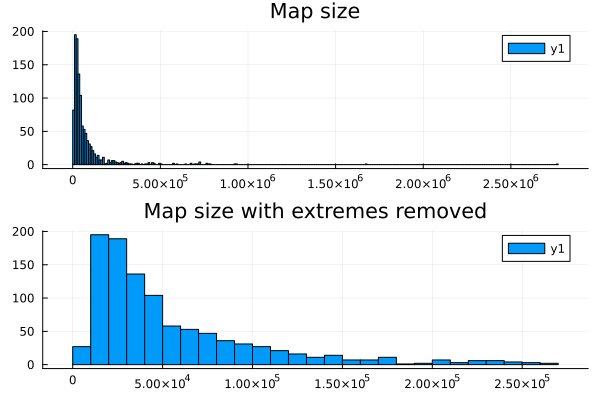

In [7]:
mapsizeandindex = [x for x in enumerate(mapsizes)]
displayvalues("Map size", mapsizeandindex)

Empty space in map
Number of values: 1136
Minimum
1. Mods\150682\Maps\Toto00\FrozenVault\1-FrozenVault-B.bin 760.0
2. Mods\150751\Maps\pupp\SummitEncore-B.bin 880.0
3. Mods\361990\Maps\firstmap\knk\knkfirstmap-B.bin 936.0
4. Mods\370683\Maps\Rainier\0-Lobbies\1-Rainier.bin 1361.0
5. Mods\355088\Maps\Cory\wwannabe\AAAMCIntro.bin 1523.0
Maximum
1. Mods\150759\Maps\nameguysdsidespack\0\10-Farewell.bin 2.311328e6
2. Mods\150759\Maps\nameguysdsidespack\1\6-FinalGoodbyeOld.bin 1.373725e6
3. Mods\359894\Maps\DarkLeviathan82\LeviathansRehearsal\LeviathansRehearsal.bin 790221.0
4. Mods\351275\Maps\Tardigrade\WaterbearMountain\WaterbearMountain.bin 755225.0
5. Mods\150418\Maps\Dong\0\Lleweraf.bin 681832.0


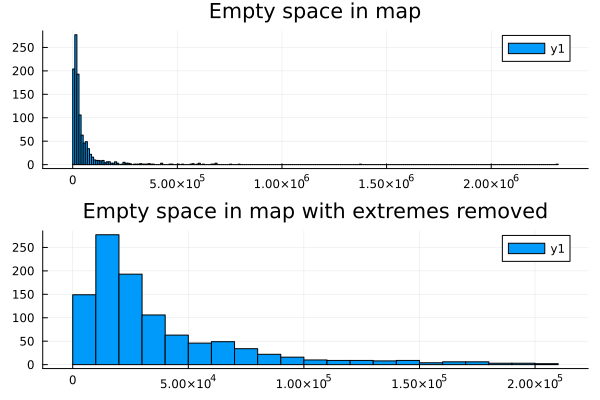

In [8]:
emptyspaceandindex = [x for x in enumerate(emptyspaces)]
displayvalues("Empty space in map", emptyspaceandindex)

Empty space to map size ratio
Number of values: 1136
Minimum
1. Mods\326785\Maps\EndGameContest2021\1-Submissions\Quinnigan.bin 0.17044224668781488
2. Mods\364346\Maps\Triangles\SmallGarden\SmallGarden.bin 0.1784965034965035
3. Mods\150789\Maps\WinterCollab2021\0-Gyms\1-Maps.bin 0.21687084354217712
4. Mods\368327\Maps\CombRoomCollab\0-Lobbies\lobby.bin 0.2287498605999777
5. Mods\150798\Maps\HalloweenContest2020\1-Submissions\Nano.bin 0.23220530174844894
Maximum
1. Mods\326785\Maps\EndGameContest2021\1-Submissions\tobyaaa.bin 1.0
2. Mods\292617\Maps\2021MapCollection\1-Mild Lobby\Clarity.bin 1.0
3. Mods\150813\Maps\SpringCollab2020\3-Advanced\Bissy.bin 1.0
4. Mods\150555\Maps\ReaverOfSouls\Sky High\1_OzoneLayer.bin 1.0
5. Mods\150555\Maps\ReaverOfSouls\Sky High\1_OzoneLayer-B.bin 1.0


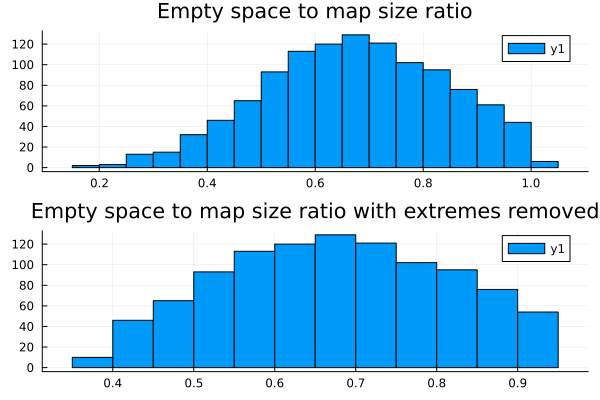

In [9]:
emptyspacetomapsizeratio = [(i, emptyspaces[i]/mapsizes[i]) for i in 1:numberofmaps]
displayvalues("Empty space to map size ratio", emptyspacetomapsizeratio)

Number of maps with hearts: 108

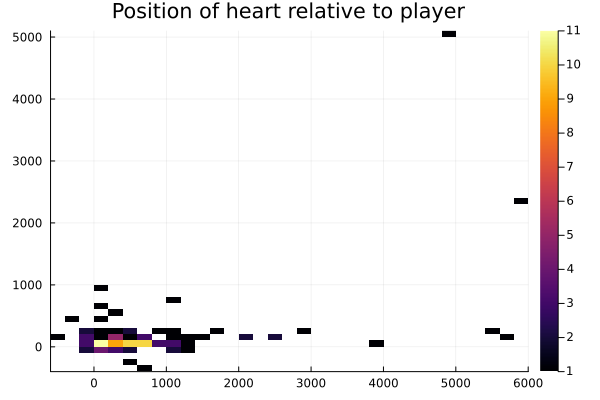

In [10]:
x = [v[1] for v in playertoheartvector if v !== nothing]
y = [v[2] for v in playertoheartvector if v !== nothing]
println("Number of maps with hearts: ", length(x))
histogram2d(x, y, title="Position of heart relative to player", bins=(50, 50))

BFS distance from player to heart
Number of values: 72
Minimum
1. Mods\384779\Maps\GravityHelperMiniCollab2022\1-Maps\pansear.bin 20.0
2. Mods\351461\Maps\powerav\NyanBday\bday.bin 21.0
3. Mods\384870\Maps\ParrotDashBirthdayCollab2022\0-Lobbies\Lobby.bin 97.0
4. Mods\150789\Maps\WinterCollab2021\0-Lobbies\1-Maps.bin 121.0
5. Mods\368327\Maps\CombRoomCollab\1-Comb\croom1a.bin 134.0
Maximum
1. Mods\150394\Maps\Marcossanches\cosmic.bin 3965.0
2. Mods\290576\Maps\dsides\6-Reflection.bin 3913.0
3. Mods\306304\Maps\Kero\Dimensions\Dimensions.bin 3296.0
4. Mods\150489\Maps\DarkLeviathan8\LeviathansUltras\LeviathansUltras.bin 2531.0
5. Mods\150554\Maps\BeefyUncle\map\2Tower.bin 2356.0


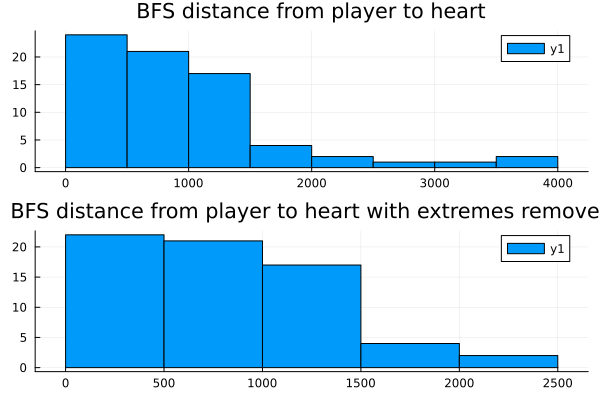

In [11]:
bfsdistanceandindex = [(i, distance) for (i, distance) in enumerate(bfsdistances) if distance !== nothing]
displayvalues("BFS distance from player to heart", bfsdistanceandindex)

BFS distance to player-heart distance ratio
Number of values: 72
Minimum
1. Mods\150394\Maps\Marcossanches\cosmic.bin 1.0048141958910826
2. Mods\368327\Maps\CombRoomCollab\1-Comb\DeskillnCombRoom.bin 1.0112138854967514
3. Mods\150800\Maps\NewYearsContest2021\1-Submissions\Linj.bin 1.019538284471566
4. Mods\368327\Maps\CombRoomCollab\1-Comb\tcookiem.bin 1.041827811777387
5. Mods\368327\Maps\CombRoomCollab\1-Comb\shrooms.bin 1.0490303313227438
Maximum
1. Mods\150813\Maps\SpringCollab2020\2-Intermediate\Lichtbaulb.bin 24.00014367773085
2. Mods\150741\Maps\Romka\Small sanctuary+\Small sanctuary.bin 9.081163042873621
3. Mods\317283\Maps\Romka\Anotherone\Anotherone.bin 7.513915951092326
4. Mods\150813\Maps\SpringCollab2020\2-Intermediate\aleph_null.bin 3.975967063213655
5. Mods\150554\Maps\BeefyUncle\map\2Tower.bin 3.398010163640287


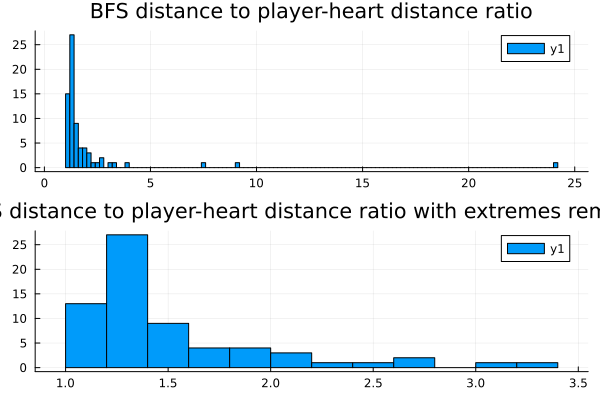

In [12]:
function vectorlength(v)
    return sqrt(v[1]*v[1] + v[2]*v[2])
end

distanceratio = [(i, bfsdistances[i]/vectorlength(playertoheartvector[i])) for i in 1:numberofmaps if bfsdistances[i] !== nothing]
displayvalues("BFS distance to player-heart distance ratio", distanceratio)